In [36]:
#Importando librerias

import pandas as pd
import numpy as np

import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff
from plotly.subplots import make_subplots
from wordcloud import WordCloud

import matplotlib.pyplot as plt

import seaborn as sns



In [37]:
df_netflix = pd.read_csv("/netflix_titles.csv") 
df_netflix.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [38]:
df_netflix.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [39]:
df_netflix.nunique()


show_id         8807
type               2
title           8807
director        4528
cast            7692
country          748
date_added      1767
release_year      74
rating            17
duration         220
listed_in        514
description     8775
dtype: int64

In [40]:
df_netflix.isna().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [41]:
# Validar duplicados

df_netflix.duplicated().sum()


0

In [42]:
#Eliminar Nullos

# df_netflix = df_netflix.dropna(axis=0, subset='rating')


df_netflix = df_netflix.dropna()

df_netflix.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s..."
8,s9,TV Show,The Great British Baking Show,Andy Devonshire,"Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...",United Kingdom,"September 24, 2021",2021,TV-14,9 Seasons,"British TV Shows, Reality TV",A talented batch of amateur bakers face off in...
9,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,"September 24, 2021",2021,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...
12,s13,Movie,Je Suis Karl,Christian Schwochow,"Luna Wedler, Jannis Niewöhner, Milan Peschel, ...","Germany, Czech Republic","September 23, 2021",2021,TV-MA,127 min,"Dramas, International Movies",After most of her family is murdered in a terr...
24,s25,Movie,Jeans,S. Shankar,"Prashanth, Aishwarya Rai Bachchan, Sri Lakshmi...",India,"September 21, 2021",1998,TV-14,166 min,"Comedies, International Movies, Romantic Movies",When the father of the man she loves insists t...


In [43]:
# Validar nulos 

df_netflix[df_netflix['rating'].isna()]


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description


In [44]:
#Agrupar valores por rating

df_netflix['rating'].unique()

array(['TV-MA', 'TV-14', 'PG-13', 'PG', 'R', 'TV-PG', 'G', 'TV-Y7',
       'TV-G', 'TV-Y', 'NC-17', 'NR', 'TV-Y7-FV', 'UR'], dtype=object)

In [45]:
df_netflix.head(10)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s..."
8,s9,TV Show,The Great British Baking Show,Andy Devonshire,"Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...",United Kingdom,"September 24, 2021",2021,TV-14,9 Seasons,"British TV Shows, Reality TV",A talented batch of amateur bakers face off in...
9,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,"September 24, 2021",2021,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...
12,s13,Movie,Je Suis Karl,Christian Schwochow,"Luna Wedler, Jannis Niewöhner, Milan Peschel, ...","Germany, Czech Republic","September 23, 2021",2021,TV-MA,127 min,"Dramas, International Movies",After most of her family is murdered in a terr...
24,s25,Movie,Jeans,S. Shankar,"Prashanth, Aishwarya Rai Bachchan, Sri Lakshmi...",India,"September 21, 2021",1998,TV-14,166 min,"Comedies, International Movies, Romantic Movies",When the father of the man she loves insists t...
27,s28,Movie,Grown Ups,Dennis Dugan,"Adam Sandler, Kevin James, Chris Rock, David S...",United States,"September 20, 2021",2010,PG-13,103 min,Comedies,Mourning the loss of their beloved junior high...
28,s29,Movie,Dark Skies,Scott Stewart,"Keri Russell, Josh Hamilton, J.K. Simmons, Dak...",United States,"September 19, 2021",2013,PG-13,97 min,"Horror Movies, Sci-Fi & Fantasy",A family’s idyllic suburban life shatters when...
29,s30,Movie,Paranoia,Robert Luketic,"Liam Hemsworth, Gary Oldman, Amber Heard, Harr...","United States, India, France","September 19, 2021",2013,PG-13,106 min,Thrillers,"Blackmailed by his company's CEO, a low-level ..."
38,s39,Movie,Birth of the Dragon,George Nolfi,"Billy Magnussen, Ron Yuan, Qu Jingjing, Terry ...","China, Canada, United States","September 16, 2021",2017,PG-13,96 min,"Action & Adventure, Dramas",A young Bruce Lee angers kung fu traditionalis...
41,s42,Movie,Jaws,Steven Spielberg,"Roy Scheider, Robert Shaw, Richard Dreyfuss, L...",United States,"September 16, 2021",1975,PG,124 min,"Action & Adventure, Classic Movies, Dramas",When an insatiable great white shark terrorize...


In [46]:
df_netflix.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [61]:
# Modificar nombre de columna en el dataframe original 

df_netflix.rename(columns={'date_added':'date_creation','listed_in' :'Gender'}, inplace=True)


In [62]:
df_netflix.head(10)

,show_id,type,title,director,cast,country,date_creation,release_year,rating,duration,Gender,description,date_year,date_month,date_day
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...",2021-09-24,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s...",2021,9,24
8,s9,TV Show,The Great British Baking Show,Andy Devonshire,"Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...",United Kingdom,2021-09-24,2021,TV-14,9 Seasons,"British TV Shows, Reality TV",A talented batch of amateur bakers face off in...,2021,9,24
9,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,2021-09-24,2021,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...,2021,9,24
12,s13,Movie,Je Suis Karl,Christian Schwochow,"Luna Wedler, Jannis Niewöhner, Milan Peschel, ...","Germany, Czech Republic",2021-09-23,2021,TV-MA,127 min,"Dramas, International Movies",After most of her family is murdered in a terr...,2021,9,23
24,s25,Movie,Jeans,S. Shankar,"Prashanth, Aishwarya Rai Bachchan, Sri Lakshmi...",India,2021-09-21,1998,TV-14,166 min,"Comedies, International Movies, Romantic Movies",When the father of the man she loves insists t...,2021,9,21
27,s28,Movie,Grown Ups,Dennis Dugan,"Adam Sandler, Kevin James, Chris Rock, David S...",United States,2021-09-20,2010,PG-13,103 min,Comedies,Mourning the loss of their beloved junior high...,2021,9,20
28,s29,Movie,Dark Skies,Scott Stewart,"Keri Russell, Josh Hamilton, J.K. Simmons, Dak...",United States,2021-09-19,2013,PG-13,97 min,"Horror Movies, Sci-Fi & Fantasy",A family’s idyllic suburban life shatters when...,2021,9,19
29,s30,Movie,Paranoia,Robert Luketic,"Liam Hemsworth, Gary Oldman, Amber Heard, Harr...","United States, India, France",2021-09-19,2013,PG-13,106 min,Thrillers,"Blackmailed by his company's CEO, a low-level ...",2021,9,19
38,s39,Movie,Birth of the Dragon,George Nolfi,"Billy Magnussen, Ron Yuan, Qu Jingjing, Terry ...","China, Canada, United States",2021-09-16,2017,PG-13,96 min,"Action & Adventure, Dramas",A young Bruce Lee angers kung fu traditionalis...,2021,9,16
41,s42,Movie,Jaws,Steven Spielberg,"Roy Scheider, Robert Shaw, Richard Dreyfuss, L...",United States,2021-09-16,1975,PG,124 min,"Action & Adventure, Classic Movies, Dramas",When an insatiable great white shark terrorize...,2021,9,16


In [63]:
# Convertir date added en tipo datetime

df_netflix["date_creation"] = pd.to_datetime(df_netflix['date_creation'])

df_netflix["date_year"] = df_netflix['date_creation'].dt.year

df_netflix["date_month"] = df_netflix['date_creation'].dt.month

df_netflix["date_day"] = df_netflix['date_creation'].dt.day


df_netflix.head(10)




,show_id,type,title,director,cast,country,date_creation,release_year,rating,duration,Gender,description,date_year,date_month,date_day
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...",2021-09-24,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s...",2021,9,24
8,s9,TV Show,The Great British Baking Show,Andy Devonshire,"Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...",United Kingdom,2021-09-24,2021,TV-14,9 Seasons,"British TV Shows, Reality TV",A talented batch of amateur bakers face off in...,2021,9,24
9,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,2021-09-24,2021,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...,2021,9,24
12,s13,Movie,Je Suis Karl,Christian Schwochow,"Luna Wedler, Jannis Niewöhner, Milan Peschel, ...","Germany, Czech Republic",2021-09-23,2021,TV-MA,127 min,"Dramas, International Movies",After most of her family is murdered in a terr...,2021,9,23
24,s25,Movie,Jeans,S. Shankar,"Prashanth, Aishwarya Rai Bachchan, Sri Lakshmi...",India,2021-09-21,1998,TV-14,166 min,"Comedies, International Movies, Romantic Movies",When the father of the man she loves insists t...,2021,9,21
27,s28,Movie,Grown Ups,Dennis Dugan,"Adam Sandler, Kevin James, Chris Rock, David S...",United States,2021-09-20,2010,PG-13,103 min,Comedies,Mourning the loss of their beloved junior high...,2021,9,20
28,s29,Movie,Dark Skies,Scott Stewart,"Keri Russell, Josh Hamilton, J.K. Simmons, Dak...",United States,2021-09-19,2013,PG-13,97 min,"Horror Movies, Sci-Fi & Fantasy",A family’s idyllic suburban life shatters when...,2021,9,19
29,s30,Movie,Paranoia,Robert Luketic,"Liam Hemsworth, Gary Oldman, Amber Heard, Harr...","United States, India, France",2021-09-19,2013,PG-13,106 min,Thrillers,"Blackmailed by his company's CEO, a low-level ...",2021,9,19
38,s39,Movie,Birth of the Dragon,George Nolfi,"Billy Magnussen, Ron Yuan, Qu Jingjing, Terry ...","China, Canada, United States",2021-09-16,2017,PG-13,96 min,"Action & Adventure, Dramas",A young Bruce Lee angers kung fu traditionalis...,2021,9,16
41,s42,Movie,Jaws,Steven Spielberg,"Roy Scheider, Robert Shaw, Richard Dreyfuss, L...",United States,2021-09-16,1975,PG,124 min,"Action & Adventure, Classic Movies, Dramas",When an insatiable great white shark terrorize...,2021,9,16


# Visualizacion de datos

*Tipos de peliculas y programas*

Text(0.5, 1.0, 'Type')

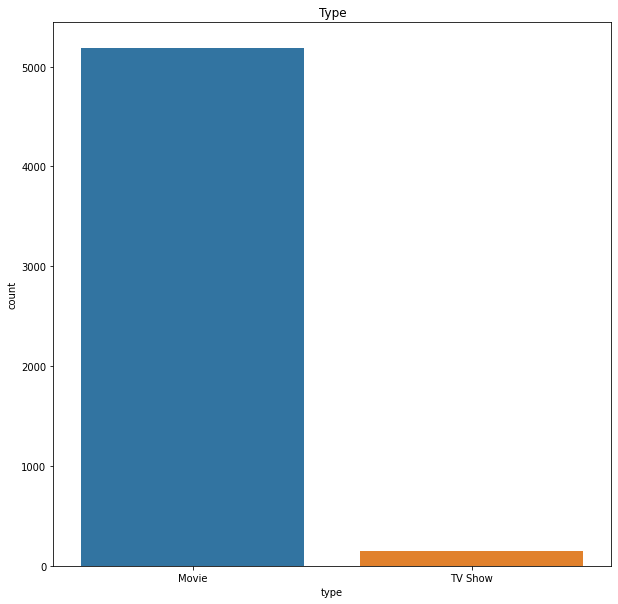

In [64]:
#Grafico de barras, validar cantidad por tipo

sns.countplot(x=df_netflix['type'])
fig = plt.gcf()
fig.set_size_inches(10,10)
plt.title('Type')


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Rating')

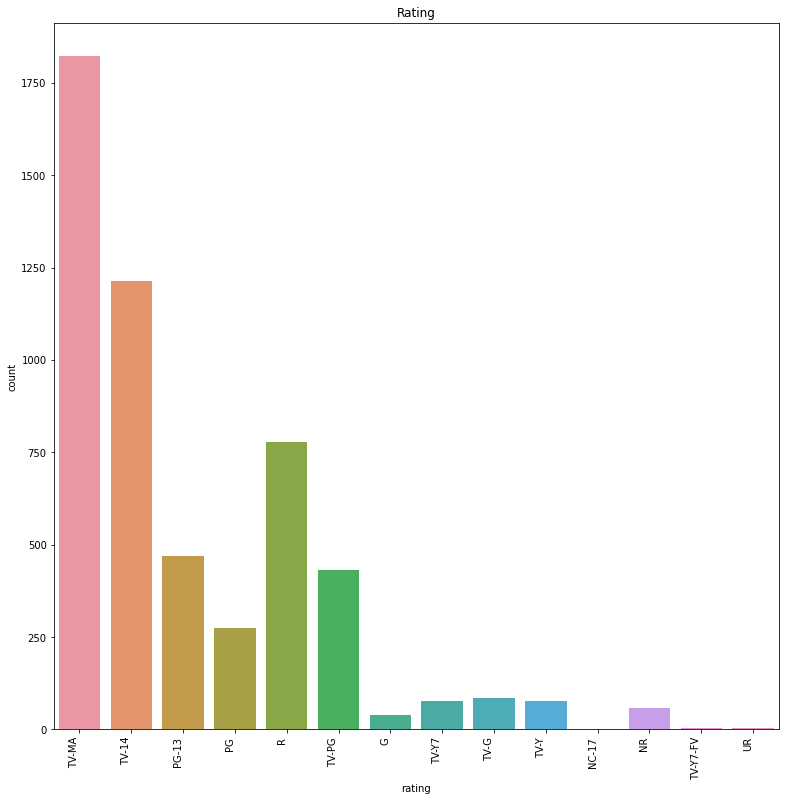

In [51]:
# Grafico de barras por rating

sns.countplot(df_netflix['rating'])
sns.countplot(df_netflix['rating']).set_xticklabels(sns.countplot(df_netflix['rating']).get_xticklabels(), rotation=90, ha="right")
fig = plt.gcf()
fig.set_size_inches(13,13)
plt.title('Rating')

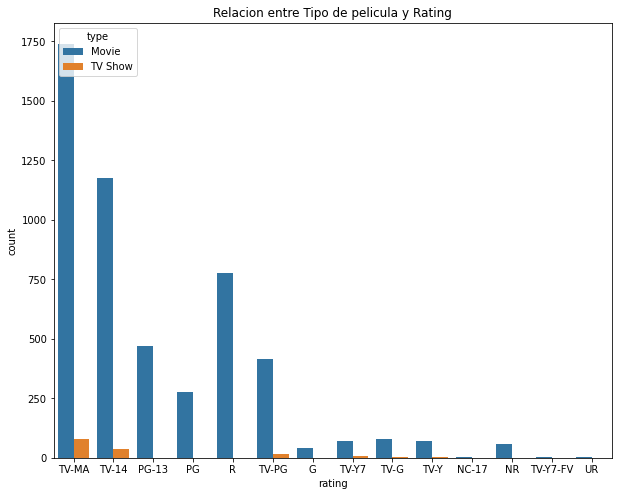

In [52]:

plt.figure(figsize=(10,8))
sns.countplot(x='rating',hue='type',data=df_netflix)
plt.title('Relacion entre Tipo de pelicula y Rating')
plt.show()

# Graficos de torta


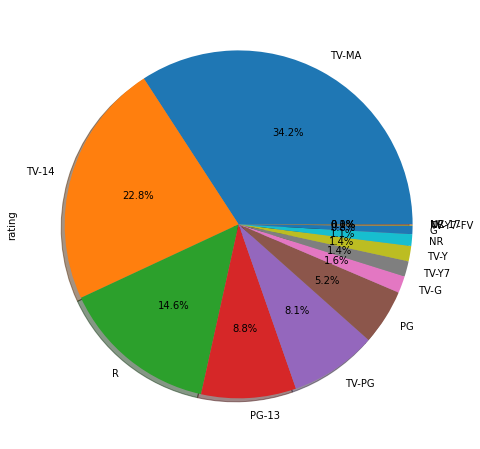

In [53]:
# Distribucion porcentual de rating

df_netflix['rating'].value_counts().plot.pie(autopct='%1.1f%%',shadow=True,figsize=(10,8))
plt.show()

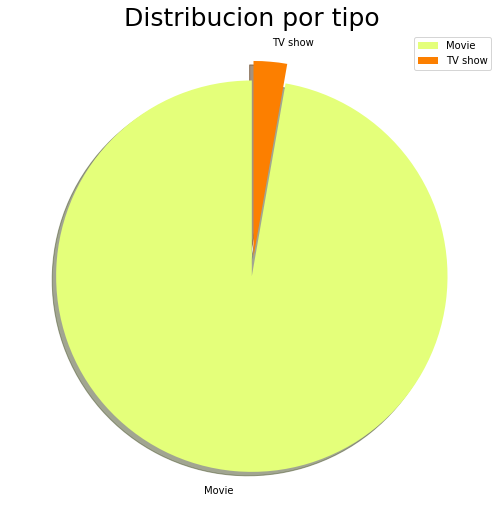

In [54]:
# Distribucion por tipo de programa

labels = ['Movie', 'TV show']
size = df_netflix['type'].value_counts()
colors = plt.cm.Wistia(np.linspace(0, 1, 2))
explode = [0, 0.1]
plt.rcParams['figure.figsize'] = (9, 9)
plt.pie(size,labels=labels, colors = colors, explode = explode, shadow = True, startangle = 90)
plt.title('Distribucion por tipo', fontsize = 25)
plt.legend()
plt.show()

In [56]:
df_netflix.head(10)

,show_id,type,title,director,cast,country,date_creation,release_year,rating,duration,listed_in,description,date_year,date_month,date_day
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...",2021-09-24,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s...",2021,9,24
8,s9,TV Show,The Great British Baking Show,Andy Devonshire,"Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...",United Kingdom,2021-09-24,2021,TV-14,9 Seasons,"British TV Shows, Reality TV",A talented batch of amateur bakers face off in...,2021,9,24
9,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,2021-09-24,2021,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...,2021,9,24
12,s13,Movie,Je Suis Karl,Christian Schwochow,"Luna Wedler, Jannis Niewöhner, Milan Peschel, ...","Germany, Czech Republic",2021-09-23,2021,TV-MA,127 min,"Dramas, International Movies",After most of her family is murdered in a terr...,2021,9,23
24,s25,Movie,Jeans,S. Shankar,"Prashanth, Aishwarya Rai Bachchan, Sri Lakshmi...",India,2021-09-21,1998,TV-14,166 min,"Comedies, International Movies, Romantic Movies",When the father of the man she loves insists t...,2021,9,21
27,s28,Movie,Grown Ups,Dennis Dugan,"Adam Sandler, Kevin James, Chris Rock, David S...",United States,2021-09-20,2010,PG-13,103 min,Comedies,Mourning the loss of their beloved junior high...,2021,9,20
28,s29,Movie,Dark Skies,Scott Stewart,"Keri Russell, Josh Hamilton, J.K. Simmons, Dak...",United States,2021-09-19,2013,PG-13,97 min,"Horror Movies, Sci-Fi & Fantasy",A family’s idyllic suburban life shatters when...,2021,9,19
29,s30,Movie,Paranoia,Robert Luketic,"Liam Hemsworth, Gary Oldman, Amber Heard, Harr...","United States, India, France",2021-09-19,2013,PG-13,106 min,Thrillers,"Blackmailed by his company's CEO, a low-level ...",2021,9,19
38,s39,Movie,Birth of the Dragon,George Nolfi,"Billy Magnussen, Ron Yuan, Qu Jingjing, Terry ...","China, Canada, United States",2021-09-16,2017,PG-13,96 min,"Action & Adventure, Dramas",A young Bruce Lee angers kung fu traditionalis...,2021,9,16
41,s42,Movie,Jaws,Steven Spielberg,"Roy Scheider, Robert Shaw, Richard Dreyfuss, L...",United States,2021-09-16,1975,PG,124 min,"Action & Adventure, Classic Movies, Dramas",When an insatiable great white shark terrorize...,2021,9,16


# Nubes de palabras


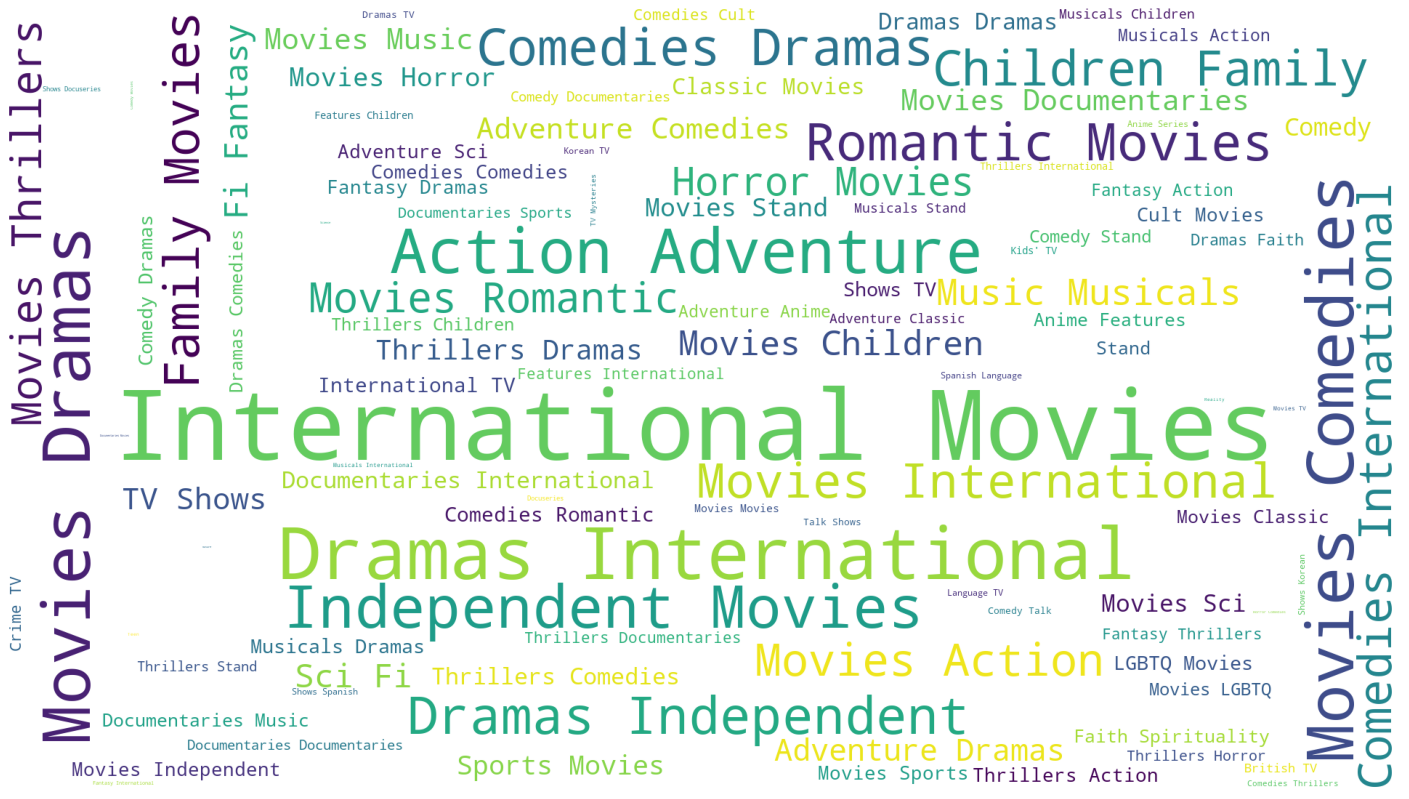

In [66]:
# Genero de pelicula mas utilizados

plt.subplots(figsize=(25,15))
wordcloud = WordCloud(
                          background_color='white',
                          width=1920,
                          height=1080
                         ).generate(" ".join(df_netflix.Gender))
plt.imshow(wordcloud)
plt.axis('off')
plt.savefig('Gender.png')
plt.show()

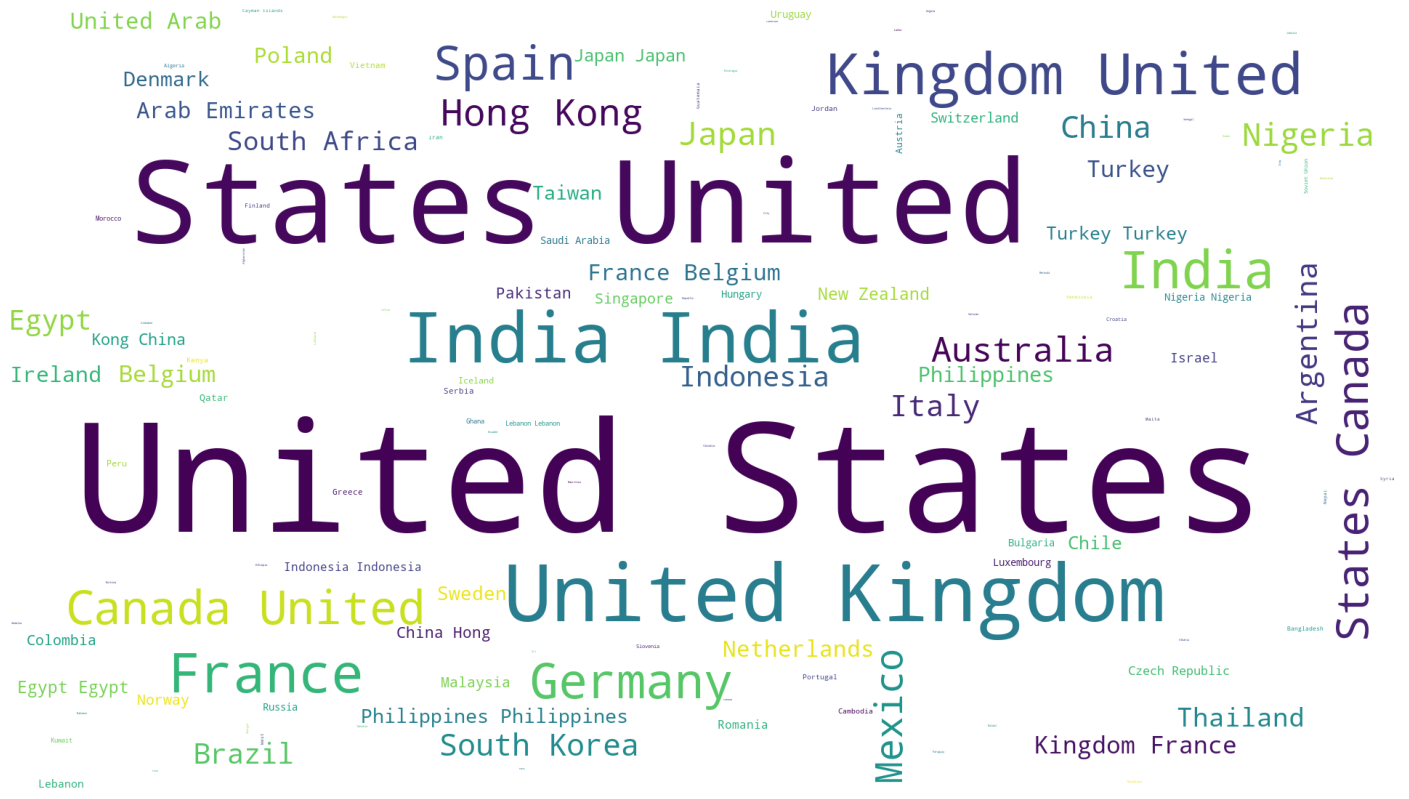

In [67]:
# Paises donde mas peliculas o programas se crean

plt.subplots(figsize=(25,15))
wordcloud = WordCloud(
                          background_color='white',
                          width=1920,
                          height=1080
                         ).generate(" ".join(df_netflix.country))
plt.imshow(wordcloud)
plt.axis('off')
plt.savefig('Pais.png')
plt.show()